# Challenge 1

## SciPy Tutorial
Pertinent information about [SciPy](https://docs.scipy.org/) and NumPy is available in the [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).
 * Read [Introduction](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)
 * Read [Basic functions](https://docs.scipy.org/doc/scipy/reference/tutorial/basic.html)
 * Read [Optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
 
Consider the function defined below.
 * Plot the function using [matplotlib](https://matplotlib.org/)

In [90]:
import numpy as np
import matplotlib.pyplot as plt

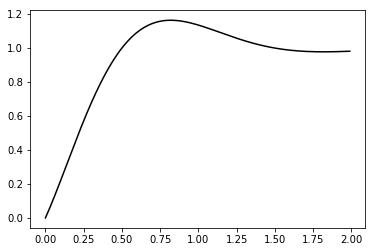

In [91]:
def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

t1 = np.arange(0.0, 2.0, 0.01)

plt.figure(1)
plt.plot(t1, g(t1), 'k')
plt.show()

Consider the class of functions of the form $f(t) = 1 - e^{-at}$ where $a$ is a free parameter.
 * Find the value of $a$ that minimizes the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0, 2]$
 * Computer the residual mean squared error
 * Explain how you obtained $a$

The Value of a that minimizes the L2 norm between g(t) and f(a,t) is 4.603468 
The residual mean squared error is 0.000113


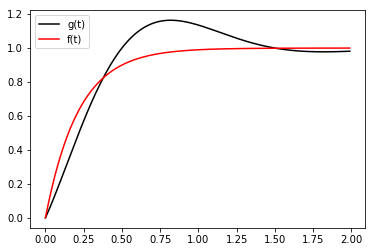

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize_scalar



# Defining function g(t):
def g(t):   
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

# Defining function f(a,t):
def f(a,t):    
    return 1- (np.exp(-a*t))

# Determinig the range of t:
t1 = np.arange(0.0, 2.0, 0.01)

# Computing the L2 norm between g(t) and f(a,t)


def parameter(a):  
    total = 0
    L2Norm = 0
    for t in (t1):
        total = total + np.square(g(t)-f(a,t))
        L2Norm = np.sqrt(total*0.01)
    return L2Norm

# Finding the value of a that minimizes the computed L2 norm between g(t) and f(a,t):
mina = minimize_scalar(parameter, method='brent')

print("The Value of a that minimizes the L2 norm between g(t) and f(a,t) is %f "%mina.x)


# Calculate the residual mean squared error:
a = mina.x
length = len(t1)
RMSE = np.square(parameter(a)) / length
print("The residual mean squared error is %f"%RMSE)


plt.figure(1)
plt.plot(t1,g(t1),'k',label='g(t)')
plt.plot(t1,f(a,t1),'r',label='f(t)')
plt.legend()
plt.show()


    